### DATA 542 - Final Project
#### Name: Ritayu Nagpal

# Initial Statistics

In [12]:
import os
import glob
import pandas as pd
import csv
import warnings
warnings.filterwarnings("ignore")

In [3]:
os.chdir('/Users/ritayu/Downloads/DATA 542 - Project/Dataset/')
all_dir = os.listdir()

Loading dataset:

In [4]:
# Review File load
FileList_Reviews = []

# some file names have wrong spelling for review as reveiw, therefore only using _newest_ for matching csv
ext = '*_newest_*.csv'
for each_dir in all_dir:
    path = '/Users/ritayu/Downloads/DATA 542 - Project/Dataset/' + str(each_dir)
    files = glob.glob(os.path.join(path, ext))
    FileList_Reviews = FileList_Reviews + files

In [5]:
dataframe_lst_rev = []
for i in range(len(FileList_Reviews)):
    dataframe_lst_rev.append(str(FileList_Reviews[i][FileList_Reviews[i].rfind("/")+1:-4]))
    dataframe_lst_rev[i] = pd.read_csv(FileList_Reviews[i])
    
    # slicing out date from the file name
    file_Date = FileList_Reviews[i][FileList_Reviews[i].rfind('/')+1:FileList_Reviews[i].rfind('/')+11]
    # slicing out app category from the file name
    app_Category = FileList_Reviews[i][FileList_Reviews[i].rfind('/')+1:][:-9][FileList_Reviews[i][FileList_Reviews[i].rfind('/')+1:][:-9].rfind('TOP_FREE_')+9:]
    
    # adding date column to the dataframe
    dataframe_lst_rev[i]['fileDate'] = file_Date
    # adding app category column to the dataframe
    dataframe_lst_rev[i]['appCategory'] = app_Category.replace('_',' ')
    # adding UID to file
    dataframe_lst_rev[i]['UID'] = list(map(lambda x: file_Date+ "_"+app_Category+"_"+str(x),list(range(len(dataframe_lst_rev[i])))))
    
full_data_reviews = pd.concat(dataframe_lst_rev)

In [21]:
# All Details file load

FileList_Details = []

ext = '*_all_detailed_*.csv'
for each_dir in all_dir:
    path = '/Users/ritayu/Downloads/DATA 542 - Project/Dataset/' + str(each_dir)
    files = glob.glob(os.path.join(path, ext))
    FileList_Details = FileList_Details + files

dataframe_lst_details = []
for i in range(len(FileList_Details)):
    dataframe_lst_details.append(str(FileList_Details[i][FileList_Details[i].rfind("/")+1:-4]))
    with open(FileList_Details[i]) as infile:
        reader = csv.reader(infile)
        headers = next(reader)
    header_indices = [i for i, item in enumerate(headers) if item]
    dataframe_lst_details[i] = pd.read_csv(FileList_Details[i], usecols=header_indices)
    
    # slicing out date from the file name
    file_Date = FileList_Details[i][FileList_Details[i].rfind('/')+1:FileList_Details[i].rfind('/')+11]
    # slicing out app category from the file name
    app_Category = FileList_Details[i][FileList_Details[i].rfind('/')+1:][:-9][FileList_Details[i][FileList_Details[i].rfind('/')+1:][:-9].rfind('TOP_FREE_')+9:]
    
    # adding date column to the dataframe
    dataframe_lst_details[i]['fileDate'] = file_Date
    # adding app category column to the dataframe
    dataframe_lst_details[i]['appCategory'] = app_Category.replace('_',' ')
    # adding UID to file
    dataframe_lst_details[i]['UID'] = list(map(lambda x: file_Date+ "_"+app_Category+"_"+str(x),list(range(len(dataframe_lst_details[i])))))

    
full_data_details = pd.concat(dataframe_lst_details)

full_data_details['appTitle_original'] = full_data_details['appTitle']
full_data_details['appTitle'] = full_data_details['appTitle'].str.lower()


### Question 1:
Drop duplicates and record how many unique reviews are collected?

In [22]:
no_duplicates_rev = full_data_reviews.drop_duplicates(subset = ['appTitle', 'userName', 'date', 'score', 'text'])
print("Unique reviews collected are", len(no_duplicates_rev))

Unique reviews collected are 1445976


### Question 2:
How many unique apps are in the dataset? How many apps in each of the 8 specified app
categories?

In [23]:
no_duplicates_rev['appTitle_original'] = no_duplicates_rev['appTitle']
no_duplicates_rev['appTitle'] = no_duplicates_rev['appTitle'].str.lower()
count_unique_apps = no_duplicates_rev['appTitle'].nunique()
unique_apps = no_duplicates_rev['appTitle'].unique()

print('There are', count_unique_apps,'apps in the dataset')

apps_by_category = no_duplicates_rev[['appCategory','appTitle']].drop_duplicates().groupby('appCategory').count().reset_index()

print("\nApps by Category:")
apps_by_category

There are 86 apps in the dataset

Apps by Category:


,appCategory,appTitle
0,EDUCATION,10
1,ENTERTAINMENT,13
2,FAMILY,10
3,FINANCE,10
4,GAME ACTION,11
5,HEALTH AND FITNESS,10
6,LIFESTYLE,12
7,MUSIC AND AUDIO,11


### Question 3:
How many reviews exist in each of the eight app-categories?

Since score column has non-null value for each row, using this column to find number of reviews in each category


In [24]:
reviews_by_category = no_duplicates_rev[['appCategory','score']].groupby('appCategory').count().reset_index()

reviews_by_category.columns = ['Category', 'Number_of_Reviews']
reviews_by_category

,Category,Number_of_Reviews
0,EDUCATION,128984
1,ENTERTAINMENT,226420
2,FAMILY,143707
3,FINANCE,185512
4,GAME ACTION,252872
5,HEALTH AND FITNESS,154168
6,LIFESTYLE,137350
7,MUSIC AND AUDIO,216963


# Question 4:
Based on the contentRating column in the details files for each app, what are the different
contentRating groups in each app-category?

In [25]:
content_rating_by_category = full_data_details[['appCategory','contentRating']].groupby(['appCategory','contentRating']).count().reset_index()
content_rating_by_category

,appCategory,contentRating
0,EDUCATION,Everyone
1,ENTERTAINMENT,Everyone
2,ENTERTAINMENT,Mature 17+
3,ENTERTAINMENT,Teen
4,FAMILY,Everyone
5,FAMILY,Everyone 10+
6,FINANCE,Everyone
7,GAME ACTION,Everyone
8,GAME ACTION,Mature 17+
9,GAME ACTION,Teen


# Question 5:
How many apps exist in each of these contentRating-sub-groups in each app-category?

In [26]:
apps_content_category = full_data_details[['appCategory','contentRating','appTitle']].drop_duplicates().groupby(['appCategory','contentRating']).count().reset_index()
apps_content_category.columns = ['appCategory', 'contentRating', 'Number_of_Apps']
apps_content_category

,appCategory,contentRating,Number_of_Apps
0,EDUCATION,Everyone,10
1,ENTERTAINMENT,Everyone,4
2,ENTERTAINMENT,Mature 17+,1
3,ENTERTAINMENT,Teen,8
4,FAMILY,Everyone,7
5,FAMILY,Everyone 10+,3
6,FINANCE,Everyone,10
7,GAME ACTION,Everyone,5
8,GAME ACTION,Mature 17+,2
9,GAME ACTION,Teen,4


# Question 6:
How many reviews in each contentRating-sub-groups in each app-category?

In [27]:
unique_content_app = full_data_details[['contentRating','appTitle']].drop_duplicates()

# 'Unicorn Slime Maker and Simulator' has multiple contentRatings, further deep diving into this app
unicorn_app_data = full_data_details[full_data_details['appTitle'] == 'Unicorn Slime Maker and Simulator']
# the data shows that the app was under 'Teen' earlier i.e. on 13-03-2019 and on all dates after that it was 'Everyone', so we will consider 'Everyone' for this app
# Other duplicated app is due to text capitalization and is not of concern

unique_content_app = unique_content_app[(unique_content_app['contentRating'] != 'Teen') | (unique_content_app['appTitle'] != 'Unicorn Slime Maker and Simulator')]

# incorporating contentRating in the reviews dataset
no_duplicates_rev = no_duplicates_rev.merge(unique_content_app, how = 'left', left_on = 'appTitle', right_on = 'appTitle')

# 331399 rows of data have no value in the appTitle column and therefore there will be no contentRating value associated with these rows
# using score for calculating reviews since its value is available for all the rows
reviews_content_category = no_duplicates_rev[['appCategory','contentRating','score']].groupby(['appCategory','contentRating']).count().reset_index()
reviews_content_category.columns = ['appCategory','contentRating', 'Number_of_Reviews']
reviews_content_category

,appCategory,contentRating,Number_of_Reviews
0,EDUCATION,Everyone,87861
1,ENTERTAINMENT,Everyone,14377
2,ENTERTAINMENT,Mature 17+,7278
3,ENTERTAINMENT,Teen,161863
4,FAMILY,Everyone,58645
5,FAMILY,Everyone 10+,48107
6,FINANCE,Everyone,141158
7,GAME ACTION,Everyone,87560
8,GAME ACTION,Mature 17+,29360
9,GAME ACTION,Teen,92577


# Text Pre-processing

### Question 7
Apply the following on the text column.
- Remove the non-English reviews.
- Remove the non-ASCII characters.
- Remove punctuations.
- Remove multiple characters if they occur more than 2 times continuously. Check your results so
that it does not change words such as HELLO that has 2 Ls.
7. Should we remove the reviews that contain two or less number of words?  
    a. Justify your answers.  
    b. Can we remove the reviews with two or less words for some score-sub-groups and keep
    them in the other ones? E.g. if the review has score 1, we should remove such reviews, but
    we should keep them if the rating is 5. Justify your answers.  
- Remove the reviews that have two or less number of words.

In [28]:
no_duplicates_rev['processed_text'] = no_duplicates_rev['text']
# converting text to string for pre-processing
no_duplicates_rev['processed_text']  = no_duplicates_rev['processed_text'].astype(str)

# removing non english words using word corpus in nltk
import nltk
from nltk.stem import PorterStemmer
porter = PorterStemmer()
words = set(nltk.corpus.words.words())

def english_words(text):
    return ' '.join(w for w in nltk.tokenize.word_tokenize(text) if porter.stem(w.lower()) in words)

# removing non ascii words
import re

def remove_non_ascii(text):
    return re.sub(r'[^\x00-\x7F]+','', text)

# removing punctuations
import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# removing multiple characters more than twice
def remove_continuous(text):
    return re.sub(r'(.)\1{2,}', r'\1\1', text)

# removing extra whitespaces from data
def remove_spaces(text):
    text = re.sub(r'\s\s+', ' ', text)
    return text.strip()

# map cleaning functions on dataframe text

no_duplicates_rev['processed_text'] = no_duplicates_rev['processed_text'].map(english_words)
#no_duplicates_rev.to_pickle('nltk-done.pickle')
#no_duplicates_rev = pd.read_pickle('nltk-done.pickle')
no_duplicates_rev['processed_text'] = no_duplicates_rev['processed_text'].map(remove_non_ascii)
no_duplicates_rev['processed_text'] = no_duplicates_rev['processed_text'].map(remove_punctuation)
no_duplicates_rev['processed_text'] = no_duplicates_rev['processed_text'].map(remove_continuous)
no_duplicates_rev['processed_text'] = no_duplicates_rev['processed_text'].map(remove_spaces)


In [29]:
#finding number of words in review using split on space
def length_words(text):
    return len(text.split())

# map function to dataframe
no_duplicates_rev['word_length_processed'] = no_duplicates_rev['processed_text'].map(length_words)
no_duplicates_rev = no_duplicates_rev[no_duplicates_rev['word_length_processed']>2]

In [30]:
print("Length of dataset after cleaning is", len(no_duplicates_rev))

Length of dataset after cleaning is 855193


# Question 8:
How many reviews exist in each of the eight app-categories? Compare with question 3.

In [31]:
reviews_by_category_processed = no_duplicates_rev[['appCategory','score']].groupby('appCategory').count().reset_index()

reviews_by_category_processed.columns = ['Category', 'Number_of_Reviews']
reviews_by_category_processed

,Category,Number_of_Reviews
0,EDUCATION,83650
1,ENTERTAINMENT,119657
2,FAMILY,91325
3,FINANCE,111647
4,GAME ACTION,127026
5,HEALTH AND FITNESS,103444
6,LIFESTYLE,85773
7,MUSIC AND AUDIO,132671


# Question 9:
How many reviews in each contentRating-sub-groups in each app-category? Compare with
question 6.

In [32]:
reviews_content_category_processed = no_duplicates_rev[['appCategory','contentRating','score']].groupby(['appCategory','contentRating']).count().reset_index()
reviews_content_category_processed.columns = ['appCategory','contentRating', 'Number_of_Reviews']
reviews_content_category_processed

,appCategory,contentRating,Number_of_Reviews
0,EDUCATION,Everyone,56981
1,ENTERTAINMENT,Everyone,9371
2,ENTERTAINMENT,Mature 17+,4468
3,ENTERTAINMENT,Teen,81751
4,FAMILY,Everyone,34492
5,FAMILY,Everyone 10+,33988
6,FINANCE,Everyone,83311
7,GAME ACTION,Everyone,50096
8,GAME ACTION,Mature 17+,10822
9,GAME ACTION,Teen,43631


In [99]:
data_9_1 = reviews_content_category.copy()
data_9_1['Concatenated'] = data_9_1['appCategory']+data_9_1['contentRating']

data_9_2 = reviews_content_category_processed.copy()
data_9_2['Concatenated'] = data_9_2['appCategory']+data_9_2['contentRating']
data_9_2.drop(['appCategory','contentRating'], axis = 1, inplace = True)

data_9 = data_9_1.merge(data_9_2, how = 'left', left_on = 'Concatenated', right_on = 'Concatenated')
data_9.drop('Concatenated', axis = 1, inplace = True)
data_9.columns = ['appCategory','contentRating','Initial Number of Reviews','Processed Number of Reviews']
data_9['Ratio'] = data_9['Processed Number of Reviews']/data_9['Initial Number of Reviews']

# Analyzing Each Category:  

## Question 10:
What is the number of reviews for each score (score column)? For example, 35000 reviews have a score of 1, etc.

This question seems to be similar to question 16, therefore not breaking down the analysis by app category in this column

In [38]:
reviews_category_score_processed = no_duplicates_rev[['score','UID']].groupby('score').count().reset_index()
reviews_category_score_processed.columns = ['score','Number_of_Reviews']
reviews_category_score_processed

,score,Number_of_Reviews
0,1,167017
1,2,40272
2,3,52779
3,4,92302
4,5,502823


# Question 11:
How many apps exist in each score-sub-group?

In [39]:
apps_category_score_processed = no_duplicates_rev[['appCategory','score','appTitle']].drop_duplicates().groupby(['appCategory','score']).count().reset_index()
apps_category_score_processed.columns = ['appCategory','score','Number_of_Apps']
apps_category_score_processed

,appCategory,score,Number_of_Apps
0,EDUCATION,1,10
1,EDUCATION,2,10
2,EDUCATION,3,10
3,EDUCATION,4,10
4,EDUCATION,5,10
5,ENTERTAINMENT,1,13
6,ENTERTAINMENT,2,13
7,ENTERTAINMENT,3,13
8,ENTERTAINMENT,4,13
9,ENTERTAINMENT,5,13


# Question 12:
Compare the number of reviews for each score in a plot (Remember to normalize the numbers
when you are comparing them).

Normalized data by subtracting mean and then dividing by standard deviation

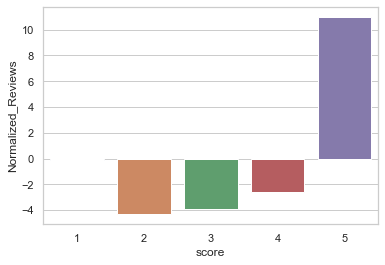

In [42]:
reviews_category_score_processed['Normalized_Reviews'] = (reviews_category_score_processed['Number_of_Reviews'] - reviews_category_score_processed['Number_of_Reviews'].mean())/reviews_content_category_processed['Number_of_Reviews'].std()
reviews_category_score_processed

#plotting
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')

ax = sns.barplot(x='score', y='Normalized_Reviews', data=reviews_category_score_processed)

# Question 13:
What is the average length of the reviews in each score-sub-group?

In [43]:
avgLength_category_score_processed = no_duplicates_rev[['appCategory','score','word_length_processed']].groupby(['appCategory','score']).mean().reset_index()
avgLength_category_score_processed.columns = ['appCategory','score','Average_Word_Length']
avgLength_category_score_processed

,appCategory,score,Average_Word_Length
0,EDUCATION,1,17.403235
1,EDUCATION,2,26.202016
2,EDUCATION,3,20.158100
3,EDUCATION,4,15.938414
4,EDUCATION,5,10.999967
5,ENTERTAINMENT,1,17.495744
6,ENTERTAINMENT,2,20.513528
7,ENTERTAINMENT,3,17.589882
8,ENTERTAINMENT,4,13.588612
9,ENTERTAINMENT,5,9.720838


# Question 14:
Compare the average length of reviews in each score-sub-group in the 8 app categories (draw a
plot).

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

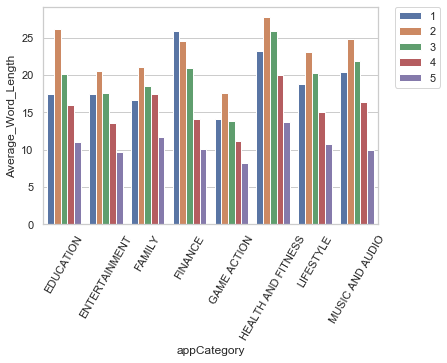

In [48]:
ax = sns.barplot(x='appCategory', y='Average_Word_Length', hue='score', data=avgLength_category_score_processed)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=60)

# Question 15:
Compare the number of reviews in each score-sub-group in the 8 app categories (draw a plot).

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

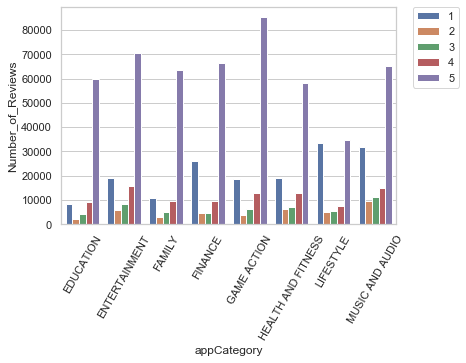

In [51]:
reviews_category_score_processed2 = no_duplicates_rev[['appCategory','score','UID']].groupby(['appCategory','score']).count().reset_index()
reviews_category_score_processed2.columns = ['appCategory','score','Number_of_Reviews']
ax = sns.barplot(x='appCategory', y='Number_of_Reviews', hue='score', data=reviews_category_score_processed2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=60)

# Question 16:
Compare the number of apps in each score-sub-group in the 8 app categories (draw a plot).

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

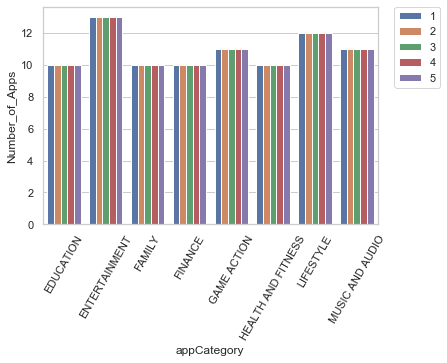

In [53]:
ax = sns.barplot(x='appCategory', y='Number_of_Apps', hue='score', data=apps_category_score_processed)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=60)

# Correlation Analysis.

## Question 17:
Is there any correlation between the length of the reviews and the score in each app-category?

In [58]:
corr_score_length = no_duplicates_rev[['appCategory','score', 'word_length_processed']].groupby('appCategory').apply(lambda x: x.corrwith(x['word_length_processed']))
print("Correlation vs Length of word:")
corr_score_length

Correlation vs Length of word:


,score,word_length_processed
appCategory,,
EDUCATION,-0.207587,1.0
ENTERTAINMENT,-0.253039,1.0
FAMILY,-0.149600,1.0
FINANCE,-0.403002,1.0
GAME ACTION,-0.210923,1.0
HEALTH AND FITNESS,-0.248917,1.0
LIFESTYLE,-0.232061,1.0
MUSIC AND AUDIO,-0.308771,1.0


There is very weak negative correaltion between score and length of words i.e. if a user is giving higher score then he tends to write shorter reviews.

# Date-time Analysis.

## Question 18:
Find the evolution/changes of the star rating and length of reviews during time for each app category. Draw plots.  
a. Can we use the date column for this question?  
b. If not, what is the solution based on the data you have?

In [59]:
from dateutil.parser import parse
no_duplicates_rev['date'] = no_duplicates_rev['date'].apply(lambda x: parse(x))
no_duplicates_rev['date_year'] = no_duplicates_rev['date'].apply(lambda x: x.year)
no_duplicates_rev['date_month'] = no_duplicates_rev['date'].apply(lambda x: x.month)
no_duplicates_rev['date_year'].value_counts()

2019    779210
2018     64615
2017      5670
2016      3665
2015      1990
2014        43
Name: date_year, dtype: int64

There are unique year values from 2014 to 2019 and its a bit skeptical if the review files will consider generating data for past so many years again but this point should be consulted and discussed with the client and data capturing team. However, I have put up 2 analysis - one considering the dates to be correct (approach 1) and other considering there is anomoly and then taking file date for analysis (approach 2)  

Calculating average score per category per month for all the years under first approach:


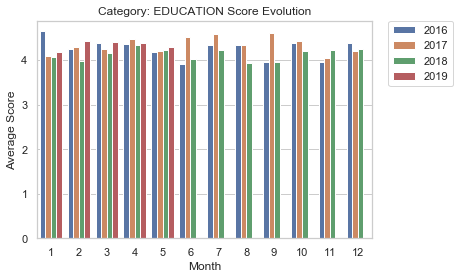

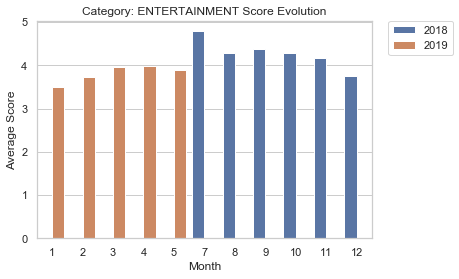

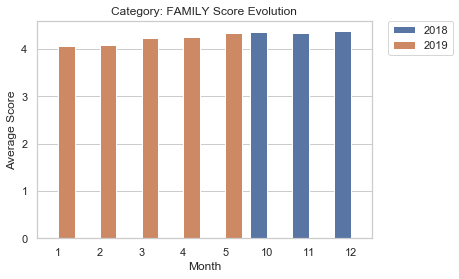

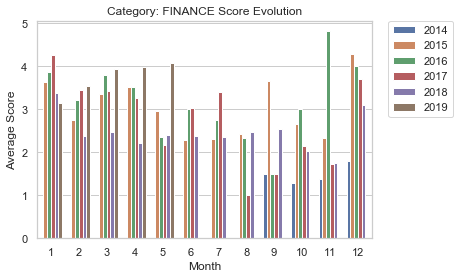

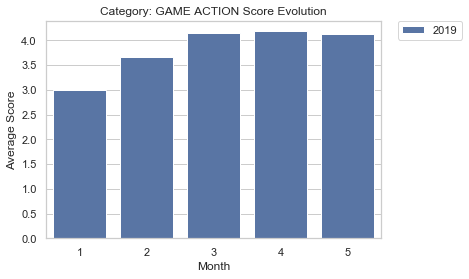

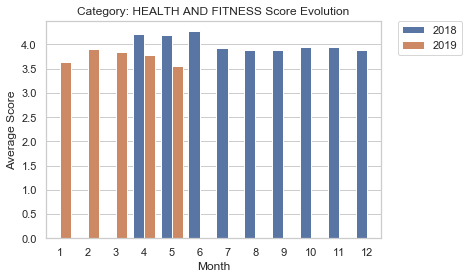

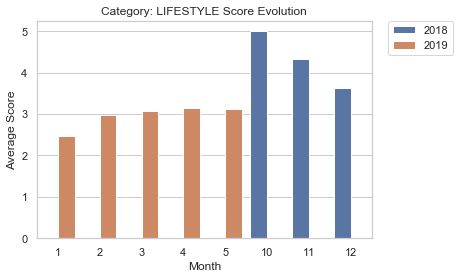

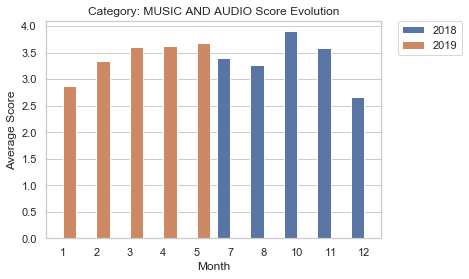

In [70]:
avg_score_cat_month_year = no_duplicates_rev[['appCategory','date_year','date_month','score','word_length_processed']].groupby(['appCategory','date_year','date_month']).mean().reset_index()


for category in avg_score_cat_month_year['appCategory'].unique():
    plt.figure(list(avg_score_cat_month_year['appCategory'].unique()).index(category))
    ax = sns.barplot(x='date_month', y='score', hue='date_year', data=avg_score_cat_month_year[avg_score_cat_month_year['appCategory']==category])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Month')
    plt.ylabel('Average Score')
    plt.title('Category: '+str(category) + " Score Evolution")



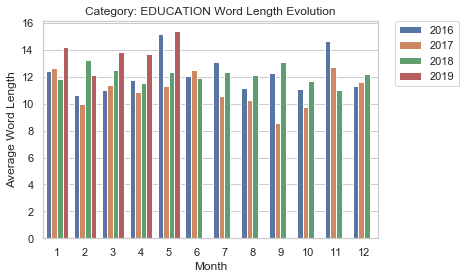

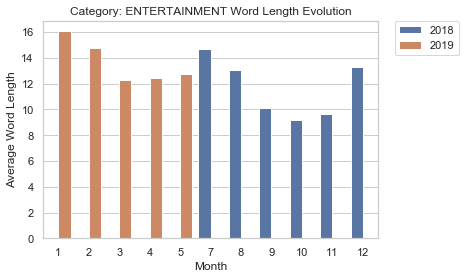

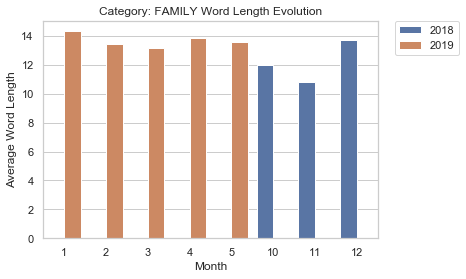

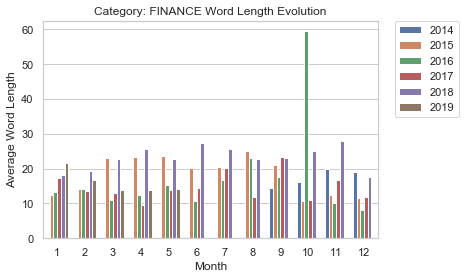

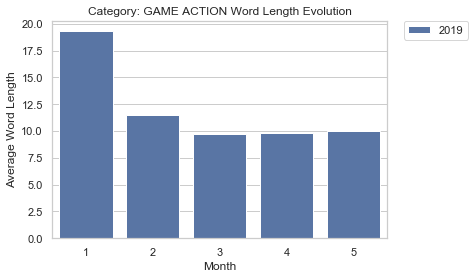

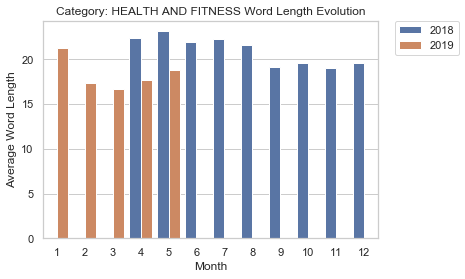

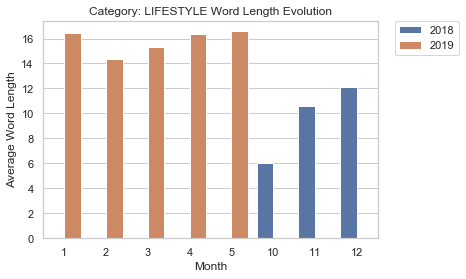

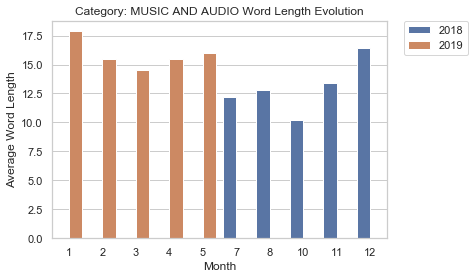

In [69]:
#wordlength
for category in avg_score_cat_month_year['appCategory'].unique():
    plt.figure(list(avg_score_cat_month_year['appCategory'].unique()).index(category))
    ax = sns.barplot(x='date_month', y='word_length_processed', hue='date_year', data=avg_score_cat_month_year[avg_score_cat_month_year['appCategory']==category])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Month')
    plt.ylabel('Average Word Length')
    plt.title('Category: '+str(category)+" Word Length Evolution")

Alternative solution: Approach 2 : evolution of score by category over each week as per file date

Text(0.5, 1.0, 'Score Evolution')

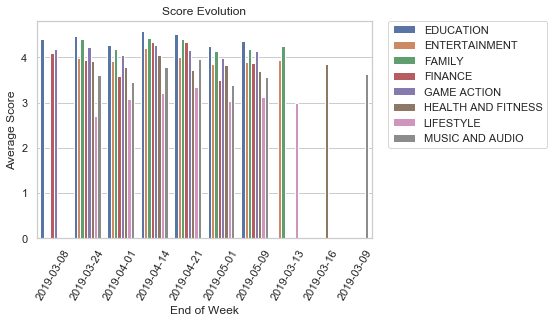

In [71]:

avg_score_week = no_duplicates_rev[['appCategory','fileDate','score', 'word_length_processed']].groupby(['appCategory','fileDate']).mean().reset_index()
# score evaluation
ax = sns.barplot(x='fileDate', y='score', hue='appCategory', data=avg_score_week)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('End of Week')
plt.ylabel('Average Score')
plt.title('Category Score Evolution')
plt.xticks(rotation=60)
plt.title("Score Evolution")


Text(0.5, 1.0, 'Word Length Evolution')

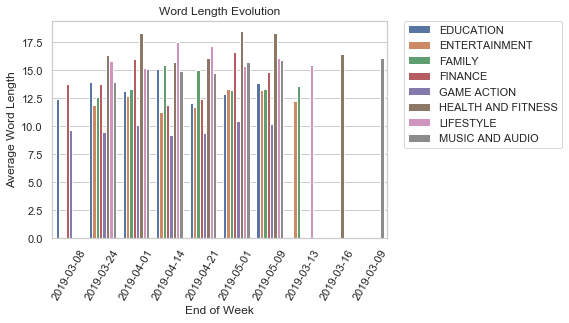

In [72]:
# word length evolution
ax = sns.barplot(x='fileDate', y='word_length_processed', hue='appCategory', data=avg_score_week)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('End of Week')
plt.ylabel('Average Word Length')
plt.xticks(rotation=60)
plt.title("Word Length Evolution")

# Manual evaluation.

## Question 19:
Compare your scores among the app categories. Do you see a difference between app categories?

In [73]:
unique_categories = no_duplicates_rev['appCategory'].unique()
unique_score = no_duplicates_rev['score'].unique()

sample_data = pd.DataFrame(columns = no_duplicates_rev.columns)
for cat in unique_categories:
    for scor in unique_score:
        data = no_duplicates_rev[(no_duplicates_rev['appCategory']==cat) & (no_duplicates_rev['score']==scor)]
        sample_data = sample_data.append(data.sample(n=5, random_state = 42))

#sample_data.to_excel('Sampled_Data.xlsx', index=False)

Sample save line code was run and then commented because we do not need to do this everytime. Analysis was done on excel file and then saved back in csv format and loaded in the script below.

No handles with labels found to put in legend.


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

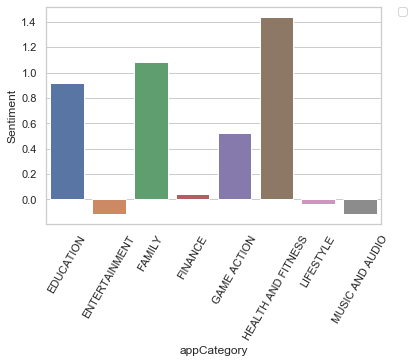

In [77]:
sample_data_worked = pd.read_csv('Sampled_Data.csv')
sample_data_worked_comparison = sample_data_worked[['appCategory','Sentiment','Constructive_Score']].groupby('appCategory').mean().reset_index()

# Sentiment comparison
ax = sns.barplot(x='appCategory', y='Sentiment', data=sample_data_worked_comparison[['appCategory','Sentiment']])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=60)


Constructive feedback is considered for both positive sentiment and negative sentiment. For positive sentiment, if technical points were provided around why customers liked the app so good feedback score was given and in the same way score was given for negative sentiment reviews as well.

No handles with labels found to put in legend.


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

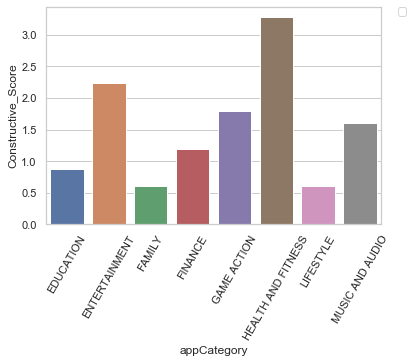

In [78]:
# Constructive feedback comparison
ax = sns.barplot(x='appCategory', y='Constructive_Score', data=sample_data_worked_comparison[['appCategory','Constructive_Score']])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=60)

# Solutions to above questions:

## Initial Statistics

### Question 1:
Drop duplicates and record how many unique reviews are collected?

In [80]:
print("Unique reviews collected are", len(no_duplicates_rev))

Unique reviews collected are 855193


### Question 2:
How many unique apps are in the dataset? How many apps in each of the 8 specified app
categories?

In [82]:
print('There are', count_unique_apps,'unique apps in the dataset')

print("\nApps by Category:")
apps_by_category

There are 86 unique apps in the dataset

Apps by Category:


,appCategory,appTitle
0,EDUCATION,10
1,ENTERTAINMENT,13
2,FAMILY,10
3,FINANCE,10
4,GAME ACTION,11
5,HEALTH AND FITNESS,10
6,LIFESTYLE,12
7,MUSIC AND AUDIO,11


### Question 3:
How many reviews exist in each of the eight app-categories?

In [83]:
print("Number of reviews in each app category:\n")
reviews_by_category

Number of reviews in each app category:



,Category,Number_of_Reviews
0,EDUCATION,128984
1,ENTERTAINMENT,226420
2,FAMILY,143707
3,FINANCE,185512
4,GAME ACTION,252872
5,HEALTH AND FITNESS,154168
6,LIFESTYLE,137350
7,MUSIC AND AUDIO,216963


### Question 4:
Based on the contentRating column in the details files for each app, what are the different
contentRating groups in each app-category?

In [84]:
print('Content Rating and Category Groups')
content_rating_by_category

,appCategory,contentRating
0,EDUCATION,Everyone
1,ENTERTAINMENT,Everyone
2,ENTERTAINMENT,Mature 17+
3,ENTERTAINMENT,Teen
4,FAMILY,Everyone
5,FAMILY,Everyone 10+
6,FINANCE,Everyone
7,GAME ACTION,Everyone
8,GAME ACTION,Mature 17+
9,GAME ACTION,Teen


### Question 5:
How many apps exist in each of these contentRating-sub-groups in each app-category?

In [85]:
apps_content_category

,appCategory,contentRating,Number_of_Apps
0,EDUCATION,Everyone,10
1,ENTERTAINMENT,Everyone,4
2,ENTERTAINMENT,Mature 17+,1
3,ENTERTAINMENT,Teen,8
4,FAMILY,Everyone,7
5,FAMILY,Everyone 10+,3
6,FINANCE,Everyone,10
7,GAME ACTION,Everyone,5
8,GAME ACTION,Mature 17+,2
9,GAME ACTION,Teen,4


### Question 6:
How many reviews in each contentRating-sub-groups in each app-category?

In [86]:
reviews_content_category

,appCategory,contentRating,Number_of_Reviews
0,EDUCATION,Everyone,87861
1,ENTERTAINMENT,Everyone,14377
2,ENTERTAINMENT,Mature 17+,7278
3,ENTERTAINMENT,Teen,161863
4,FAMILY,Everyone,58645
5,FAMILY,Everyone 10+,48107
6,FINANCE,Everyone,141158
7,GAME ACTION,Everyone,87560
8,GAME ACTION,Mature 17+,29360
9,GAME ACTION,Teen,92577


# Text Pre-processing

### Question 7:
Should we remove the reviews that contain two or less number of words?  
a. Justify your answers.  
b. Can we remove the reviews with two or less words for some score-sub-groups and keep
them in the other ones? E.g. if the review has score 1, we should remove such reviews, but
we should keep them if the rating is 5. Justify your answers.

#### Solution: 7(a)

Yes, we should remove the reviews with 2 or less words because such reviews won't make any sense as the feedback provided in such reviews will not be detailed. It is also very likely that such reviews will have meaning less data as some users try to just put some random keystrokes to fill the review section.  


#### Solution: 7(b)

No, if we are removing reviews with less than 2 words, then we should remove them from the entire dataset and not just from low score reviews as taking such an action will add bias to our analysis at later stage as we purposely removed the bad reviews and kept the higher rating ones even if the textual review does not make any sense


Removed non-english, non-ascii, punctuations, more than 2 occurences of alphabets and less than 2 words text reviews from the data using the code mentioned in the first section of Question 7 above.

### Question 8:
How many reviews exist in each of the eight app-categories? Compare with question 3.

In [90]:
data = reviews_by_category.merge(reviews_by_category_processed, how = 'left', left_on='Category', right_on = 'Category')
data.columns = ["Category", "Initial Number", "Processed Number"]
data['Ratio'] = data["Processed Number"]/data["Initial Number"]
data

,Category,Initial Number,Processed Number,Ratio
0,EDUCATION,128984,83650,0.648530
1,ENTERTAINMENT,226420,119657,0.528474
2,FAMILY,143707,91325,0.635494
3,FINANCE,185512,111647,0.601832
4,GAME ACTION,252872,127026,0.502333
5,HEALTH AND FITNESS,154168,103444,0.670982
6,LIFESTYLE,137350,85773,0.624485
7,MUSIC AND AUDIO,216963,132671,0.611491


The number of reviews have reduced in all the categories and this was expected as well since cleaning involved deleting some rows. Game Action has the maximum fraction of its rows deleted.

### Question 9:
How many reviews in each contentRating-sub-groups in each app-category? Compare with
question 6.

In [100]:
data_9

,appCategory,contentRating,Initial Number of Reviews,Processed Number of Reviews,Ratio
0,EDUCATION,Everyone,87861,56981,0.648536
1,ENTERTAINMENT,Everyone,14377,9371,0.651805
2,ENTERTAINMENT,Mature 17+,7278,4468,0.613905
3,ENTERTAINMENT,Teen,161863,81751,0.505063
4,FAMILY,Everyone,58645,34492,0.588149
5,FAMILY,Everyone 10+,48107,33988,0.706508
6,FINANCE,Everyone,141158,83311,0.590197
7,GAME ACTION,Everyone,87560,50096,0.572133
8,GAME ACTION,Mature 17+,29360,10822,0.368597
9,GAME ACTION,Teen,92577,43631,0.471294


Major decrease is again seen in the game action category and it is due to the fact that maximum number of reviews were removed from this category.

# Analyzing Each Category

### Question 10:
What is the number of reviews for each score (score column)? For example, 35000 reviews have a score of 1, etc.

Since the example associated does not take into account categories, therefore calculating number of reviews only on score and not considering category wise analysis in this case.

In [164]:
reviews_category_score_processed[['score', 'Number_of_Reviews']]

,score,Number_of_Reviews
0,1,167017
1,2,40272
2,3,52779
3,4,92302
4,5,502823


### Question 11:
How many apps exist in each score-sub-group?

In [102]:
apps_category_score_processed

,appCategory,score,Number_of_Apps
0,EDUCATION,1,10
1,EDUCATION,2,10
2,EDUCATION,3,10
3,EDUCATION,4,10
4,EDUCATION,5,10
5,ENTERTAINMENT,1,13
6,ENTERTAINMENT,2,13
7,ENTERTAINMENT,3,13
8,ENTERTAINMENT,4,13
9,ENTERTAINMENT,5,13


### Question 12:
Compare the number of reviews for each score in a plot (Remember to normalize the numbers
when you are comparing them).

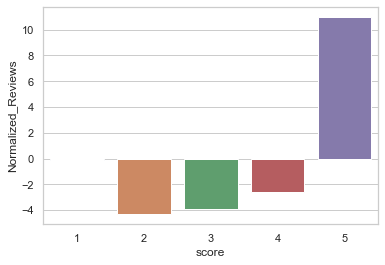

In [103]:
ax = sns.barplot(x='score', y='Normalized_Reviews', data=reviews_category_score_processed)

### Question 13:
What is the average length of the reviews in each score-sub-group?

In [104]:
avgLength_category_score_processed

,appCategory,score,Average_Word_Length
0,EDUCATION,1,17.403235
1,EDUCATION,2,26.202016
2,EDUCATION,3,20.158100
3,EDUCATION,4,15.938414
4,EDUCATION,5,10.999967
5,ENTERTAINMENT,1,17.495744
6,ENTERTAINMENT,2,20.513528
7,ENTERTAINMENT,3,17.589882
8,ENTERTAINMENT,4,13.588612
9,ENTERTAINMENT,5,9.720838


### Question 14:
Compare the average length of reviews in each score-sub-group in the 8 app categories (draw a
plot).

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

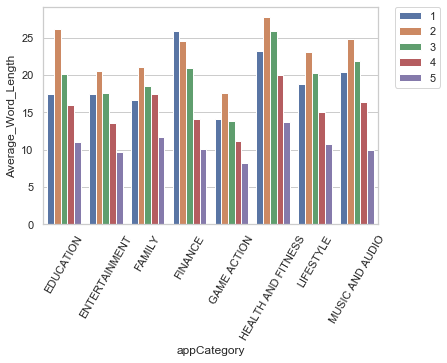

In [158]:
ax = sns.barplot(x='appCategory', y='Average_Word_Length', hue='score', data=avgLength_category_score_processed)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=60)

### Question 15:
Compare the number of reviews in each score-sub-group in the 8 app categories (draw a plot).

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

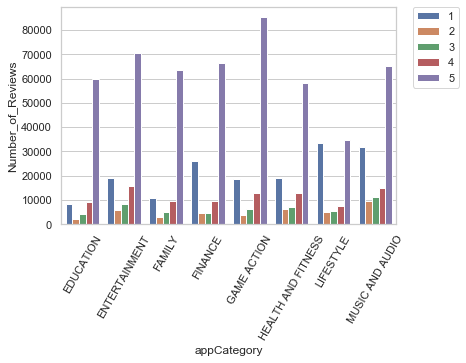

In [106]:
ax = sns.barplot(x='appCategory', y='Number_of_Reviews', hue='score', data=reviews_category_score_processed2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=60)

Score group '1' has substantially more number of reviews available than other score groups.

### Question 16:
Compare the number of apps in each score-sub-group in the 8 app categories (draw a plot).

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

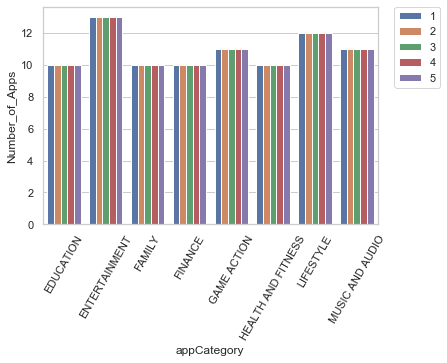

In [107]:
ax = sns.barplot(x='appCategory', y='Number_of_Apps', hue='score', data=apps_category_score_processed)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=60)

All apps seem to have same number of apps in all the score categories.

# Correlation Analysis

### Question 17:
Is there any correlation between the length of the reviews and the score in each app-category?

In [110]:
print("Correlation between Score and Review Word Length:")
corr_score_length['score']

Correlation between Score and Review Word Length:


appCategory
EDUCATION            -0.207587
ENTERTAINMENT        -0.253039
FAMILY               -0.149600
FINANCE              -0.403002
GAME ACTION          -0.210923
HEALTH AND FITNESS   -0.248917
LIFESTYLE            -0.232061
MUSIC AND AUDIO      -0.308771
Name: score, dtype: float64

There seems to be very weak negative correlation for few of the app categories. But in general, since the correlation numbers in magnitude are small and not much close to 1 or -1, we can say there is very weak negative correaltion i.e. inversely correlated.

# Date-time Analysis

### Question 18:
Find the evolution/changes of the star rating and length of reviews during time for each app category. Draw plots.  
a. Can we use the date column for this question?  
b. If not, what is the solution based on the data you have?  

#### Solution: 18 (a)

There are unique year values from 2014 to 2019 and its a bit skeptical if the review files will consider generating data for past so many years again but this point should be consulted and discussed with the client and data capturing team.   
  

So, if we are sure that the data captured is actually for years between 2014 and 2019 and we want to include that into analysis, then we can use the date column otherwise we will have to drop this column as this 'date' column in that case might have misleading information.  

#### Solution: 18 (b)

The solution for this case is that we can use the date, when the file was generated i.e. the date on each of the data files. Data files are pulled every week from the system and basis our assumption we can do a weekly analysis rather than going for daily analysis using the data generated in the file at the end of a week.  

However, I have put up 2 analysis - one considering the dates to be correct (approach 1) and other considering there is anomoly and then taking file date for analysis (approach 2).  

#### Approach 1: Considering we are sure that data is for years 2014-2019, then I have done monthly evolution analysis

Score Evaluation: 



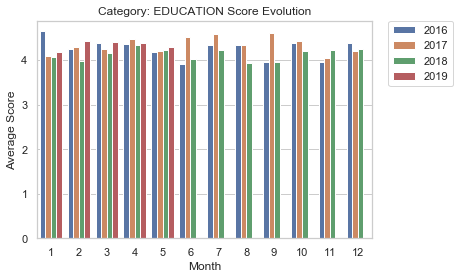

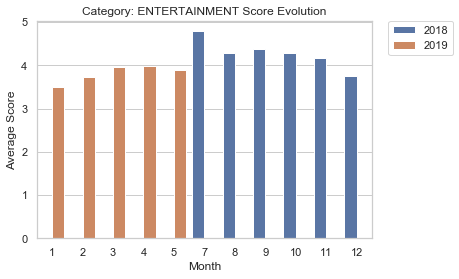

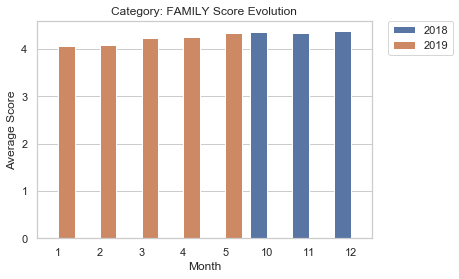

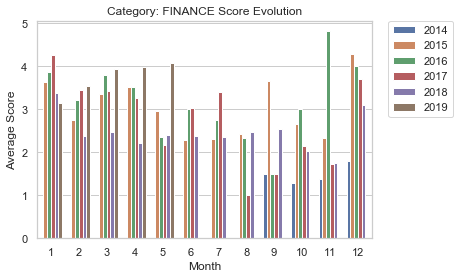

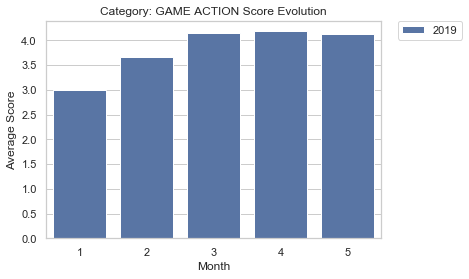

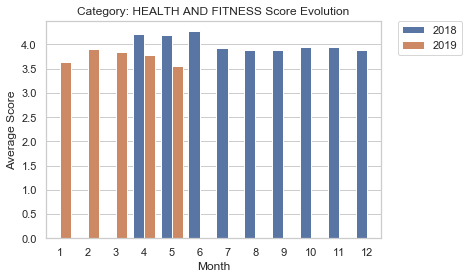

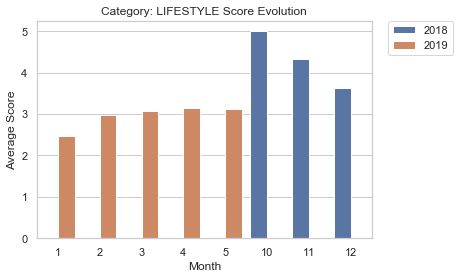

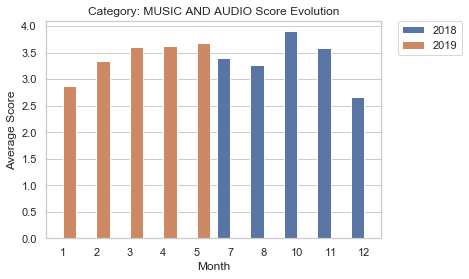

In [111]:
print("Score Evaluation: \n")

for category in avg_score_cat_month_year['appCategory'].unique():
    plt.figure(list(avg_score_cat_month_year['appCategory'].unique()).index(category))
    ax = sns.barplot(x='date_month', y='score', hue='date_year', data=avg_score_cat_month_year[avg_score_cat_month_year['appCategory']==category])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Month')
    plt.ylabel('Average Score')
    plt.title('Category: '+str(category) + " Score Evolution")

Word Length Evolution:



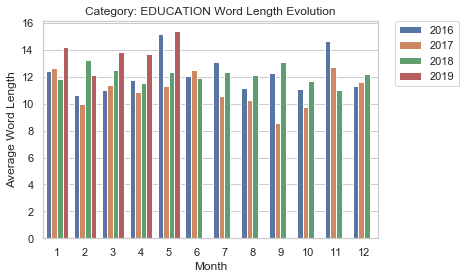

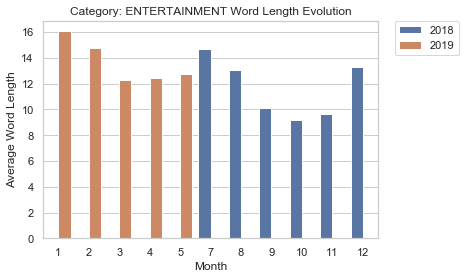

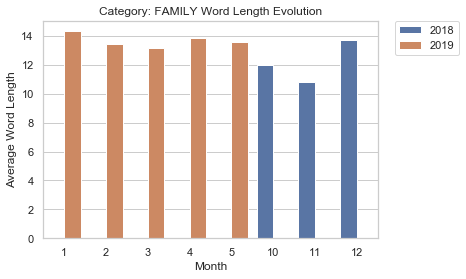

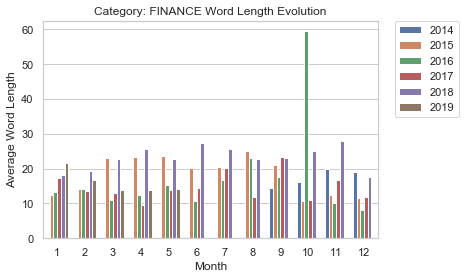

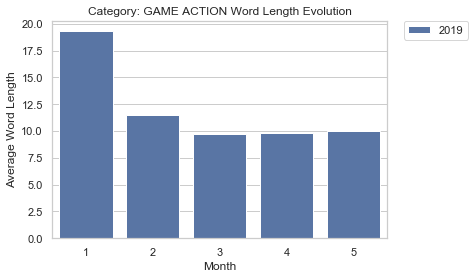

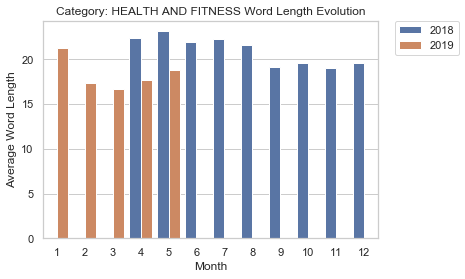

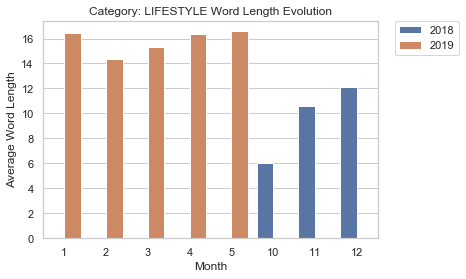

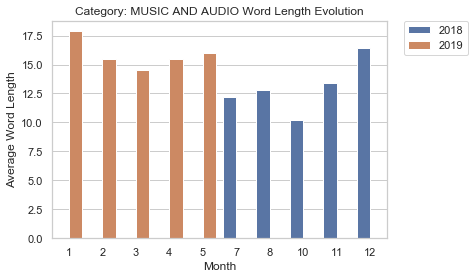

In [112]:
print("Word Length Evolution:\n")
for category in avg_score_cat_month_year['appCategory'].unique():
    plt.figure(list(avg_score_cat_month_year['appCategory'].unique()).index(category))
    ax = sns.barplot(x='date_month', y='word_length_processed', hue='date_year', data=avg_score_cat_month_year[avg_score_cat_month_year['appCategory']==category])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Month')
    plt.ylabel('Average Word Length')
    plt.title('Category: '+str(category)+" Word Length Evolution")

#### Aproach 2: Considering date years from 2014-2019 are wrong and using the file date for analysis:

Score Evaluation: 



Text(0.5, 1.0, 'Score Evolution')

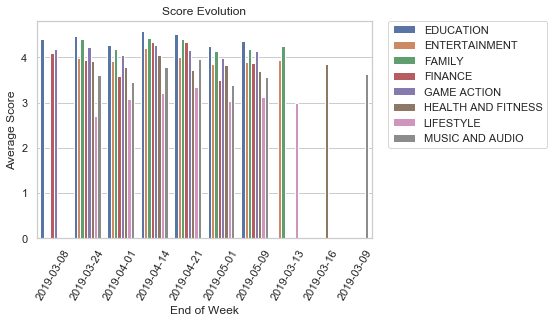

In [162]:
print("Score Evaluation: \n")

ax = sns.barplot(x='fileDate', y='score', hue='appCategory', data=avg_score_week)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('End of Week')
plt.ylabel('Average Score')
plt.title('Category Score Evolution')
plt.xticks(rotation=60)
plt.title("Score Evolution")

Word Length Evolution:



Text(0.5, 1.0, 'Word Length Evolution')

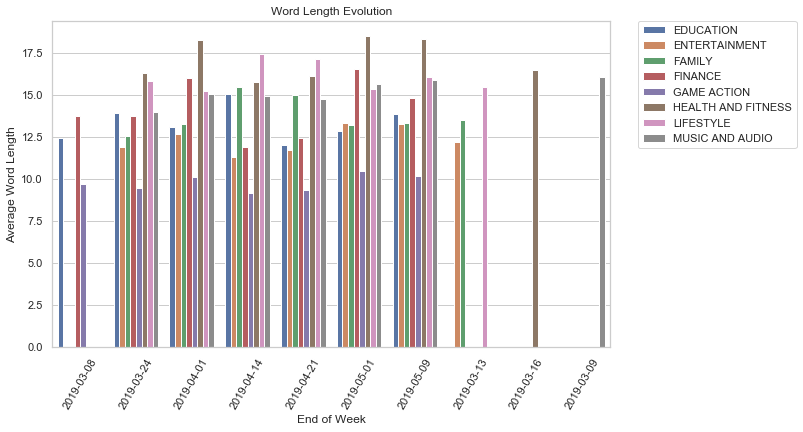

In [163]:
print("Word Length Evolution:\n")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='fileDate', y='word_length_processed', hue='appCategory', data=avg_score_week)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('End of Week')
plt.ylabel('Average Word Length')
plt.xticks(rotation=60)
plt.title("Word Length Evolution")

# Manual evaluation

### Question 19:
Compare your scores among the app categories. Do you see a difference between app categories?

#### Sentiment Analysis:

No handles with labels found to put in legend.


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

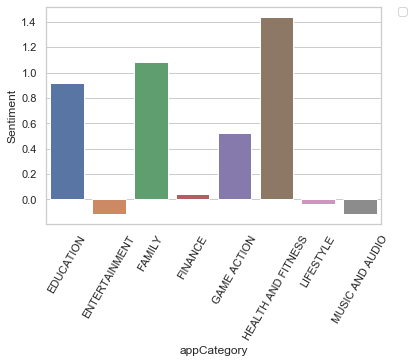

In [115]:
ax = sns.barplot(x='appCategory', y='Sentiment', data=sample_data_worked_comparison[['appCategory','Sentiment']])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=60)

#### Constructive Score Analysis:

No handles with labels found to put in legend.


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

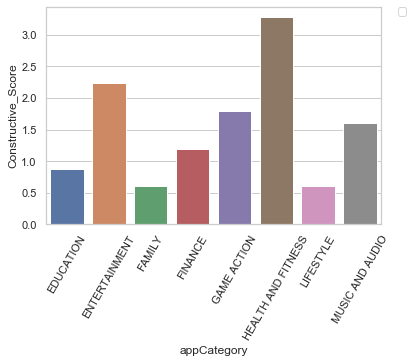

In [116]:
ax = sns.barplot(x='appCategory', y='Constructive_Score', data=sample_data_worked_comparison[['appCategory','Constructive_Score']])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=60)